# Development of PN Class

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from positive.physics import pn
from positive.maths import lim
from matplotlib.pyplot import *
from nrutils import scsearch,gwylm
from positive.physics import mishra
from numpy import hstack

(positive)>> Applying custom matplotlib settings.


### Load NR waveform for comparison

In [2]:
# A = scsearch(keyword='q8a085a085_D9itm11dr05_112',apply_remnant_fit=True,verbose=True)
A = scsearch(institute='bam',q=[2,4],nonspinning=True,apply_remnant_fit=True,verbose=True)

(scsearch)>> Found apply_remnant_fit (=True) keyword.
(scsearch)>> Found institute (=bam) keyword.
(scsearch)>> Found nonspinning (=True) keyword.
(scsearch)>> Found q (=...) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch!)>> Applying remant fit to scentry objects. This should be done if the final mass and spin meta data are not trustworth. The fit being used only works for non-precessing systems.
## Found 7 possibly degenerate simulations:
[0001][silures] BAM: ns-q4.00	(q4a0_T_112_448)
[0002][silures] BAM: ns-q4.00	(q4._0._0._D40D11_new_ptprQC_T_64_288)
[0003][silures] BAM: ns-q4.00	(q4a0_T_112_448)
[0004][silures] BAM: ns-q4.00	(um4_88)
[0005][silures] BAM: ns-q4.00	(q4a0_T_112_448)
[0006][silures] BAM: ns-q4.00	(um4_88)
[0007][silures] BAM: ns-q4.00	(um4_88)



In [3]:
y = gwylm( A[0], lmax=3, clean=False, dt = 0.5 )

/Users/book/JOKI/Libs/KOALA/positive_dev/positive/physics.py:425: RuntimeWarning: invalid value encountered in power
  V = lambda m: pow(2.0*pi*M*f/m,1.0/3)
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/physics.py:486: RuntimeWarning: divide by zero encountered in power
  hlm_amp = M*M*pi * sqrt(eta*2.0/3)*(V(m)**-3.5) * H[l,m]( V(m) )


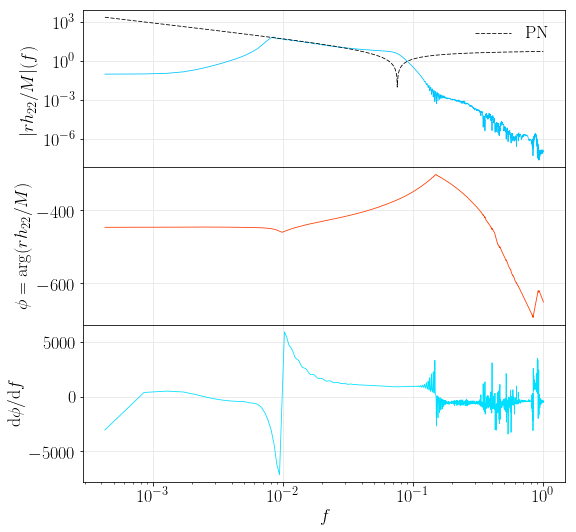

In [4]:
ax,fig = y.lm[2,2]['strain'].plot(domain='freq')
sca(ax[0])
pn_fd_y22 = mishra( y.lm[2,2]['strain'].f, y.m1, y.m2, y.X1, y.X2, [2,2] )
plot( y.lm[2,2]['strain'].f, abs(pn_fd_y22), color='k', ls='--', label='PN' )
legend()

### Try intializing an instance of the PN class

In [5]:
# Calculate radiated and remnant parameters 
y.__calc_radiated_quantities__()

In [40]:
# Define initial binary parameters 
m1 = y.m1
m2 = y.m2
X1 = y.X1
X2 = y.X2

# foo = pn( m1,m2,X1,X2, wM_max=1.05*y.lm[2,2]['strain'].dphi[y.remnant['mask']][0]/2, wM_min=0.7*y.lm[2,2]['strain'].dphi[y.remnant['mask']][0]/2 )
foo = pn( m1,m2,X1,X2, 
          wM_max=1.05*y.lm[2,2]['strain'].dphi[y.remnant['mask']][0], 
          wM_min=0.7*y.lm[2,2]['strain'].dphi[y.remnant['mask']][0]/2,
          sceo = y.__scentry__ )

(pn)>> Now constructing instance of the pn class.
(pn)>> Defining the initial binary state based on inputs.
(__validative_constructor__)>> Rescaling masses so that m1+m2=1
(__calc_orbital_frequency__)>> Calculating evolution of orbital phase using RK4 steps.
(__calc_com_binding_energy__)>> Calculating COM binding energy
(__calc_hlm_of_t__)>> Calculating the (l,m)=(2,2) spherical multipole.
(__calc_hlm_of_t__)>> Calculating the (l,m)=(3,2) spherical multipole.
(__to_gwylmo__)>> Making gwylm represenation.
(__to_gwylmo__)>> Interpolating time domain waveforms for equispacing.


### Plot some parameters of interest

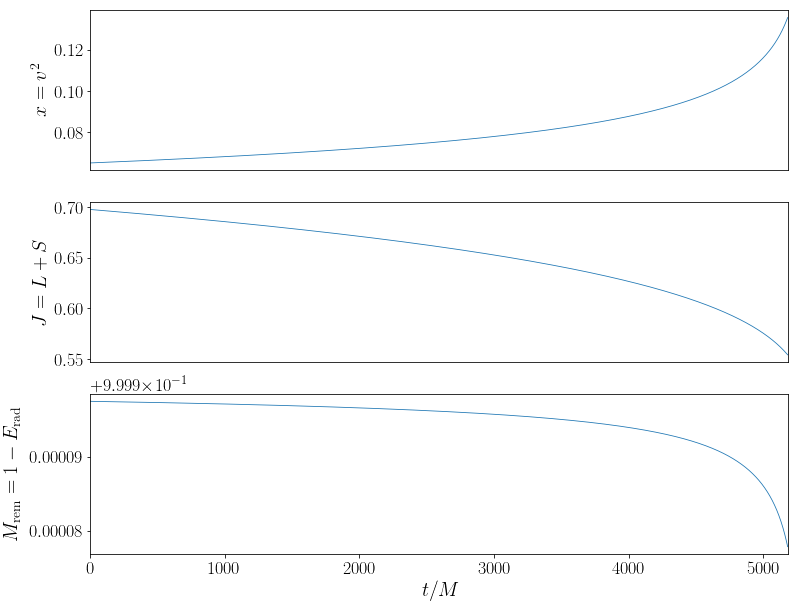

In [33]:

figure( figsize=2.5*figaspect(0.8) )

subplot(3,1,1)
plot( foo.t, foo.v**2 )
xlim(lim(foo.t))
ylabel('$x=v^2$')
xticks([])

subplot(3,1,2)
plot( foo.t, foo.remnant['J'] )
xlim(lim(foo.t))
ylabel('$J=L+S$')
xticks([])

subplot(3,1,3)
plot( foo.t, foo.remnant['M'] )
xlim(lim(foo.t))
xlabel('$t/M$')
ylabel(r'$M_{\mathrm{rem}} = 1-E_{\mathrm{rad}}$');


### Make select comparisons with NR data

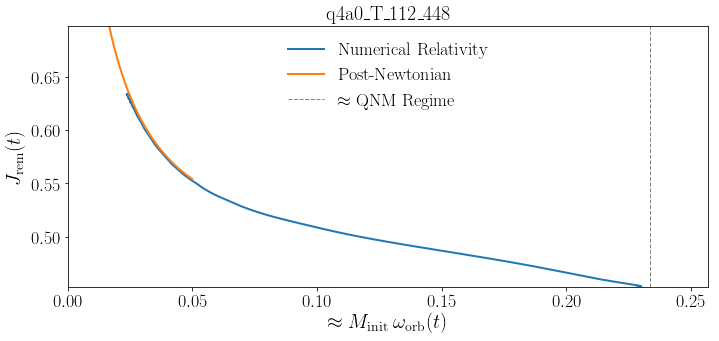

In [34]:

from kerr import leaver

#
fig = figure( figsize=1.2*figaspect(0.418) )

#
plot( y.lm[2,2]['strain'].dphi[y.remnant['mask']]/2, y.remnant['J'][:,-1], label='Numerical Relativity', lw=2 )
plot( foo.wM, foo.remnant['J'], label='Post-Newtonian', lw=2, ls='-' )

#
axvline(leaver(y.xf,2,2,Mf=y.mf)[0].real/2, color='k',ls='--',alpha=0.6, label=r'$\approx$ QNM Regime'  )

#
xlabel(r'$\approx M_{\mathrm{init}} \; \omega_{\mathrm{orb}}(t)$')
ylabel(r'$J_{\mathrm{rem}}(t)$')
title( r'%s'%y.simname.replace('_','\_') )
xlim([0,1.1*leaver(y.xf,2,2,Mf=y.mf)[0].real/2])
ylim( [ 0.96*y.xf , max(foo.remnant['J']) ] )
legend()

#


#
savefig('/Users/book/KOALA/kerr_dev/projects/spheroidal_imr/gallery/pn_j_rem_%s.pdf'%y.simname)

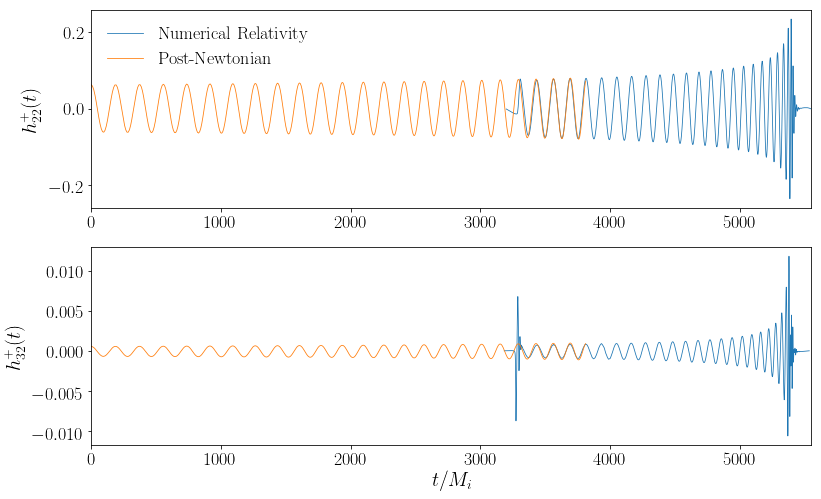

In [35]:

#
fig = figure( figsize=2*figaspect(0.62) )

t_shift = 3200
y_t = y.t+t_shift
xl = lim( hstack([y_t,foo.t]) )
msk = (foo.wM<=1.05*y.lm[2,2]['strain'].dphi[y.remnant['mask']][0]/2) & (foo.wM>=0.7*y.lm[2,2]['strain'].dphi[y.remnant['mask']][0]/2)

#
subplot(2,1,1)
plot( y_t, y.lm[2,2]['strain'].y.real, label='Numerical Relativity' )
plot( foo.t[msk], foo.h[2,2].real[msk], label='Post-Newtonian' )
legend()
xlim(xl)
ylabel('$h^+_{\mathrm{22}}(t)$')

#
subplot(2,1,2)
plot( y_t-15, y.lm[3,2]['strain'].y.real ) # the "-15" is an ad-hoc cludge only for the purpose of making a plot quickly!
plot( foo.t[msk], foo.h[3,2].real[msk] )
xlabel('$t/M_{i}$')
legend()
xlim(xl)
ylabel('$h^+_{\mathrm{32}}(t)$')

#
savefig('/Users/book/KOALA/kerr_dev/projects/spheroidal_imr/gallery/pn_nr_ht_22_32_%s.pdf'%y.simname)


### Plot using the gwylm represenation

([<matplotlib.axes._subplots.AxesSubplot at 0x113822b10>,
 <matplotlib.figure.Figure at 0x11368c790>)

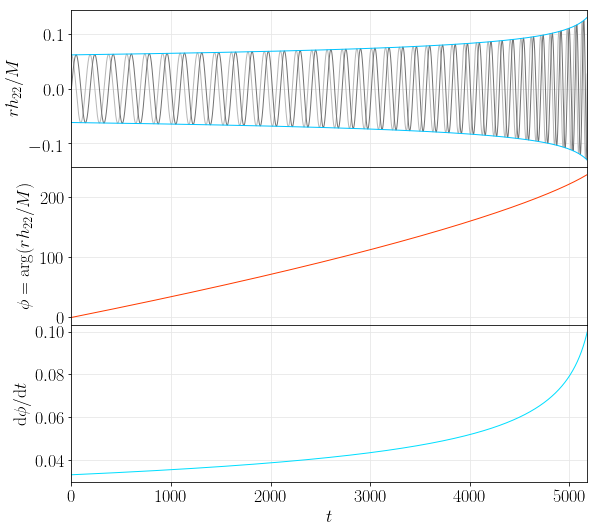

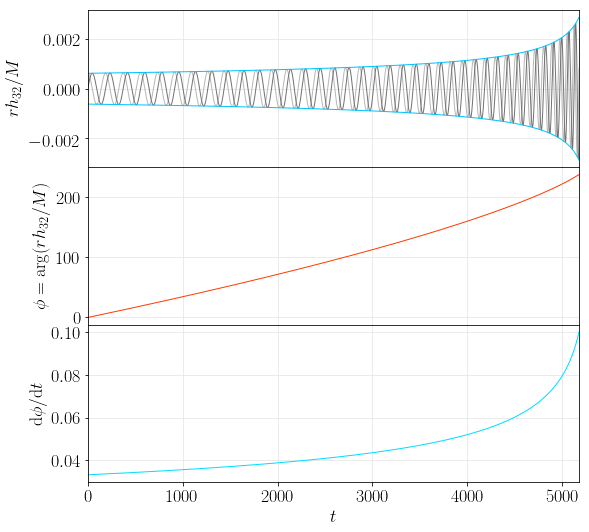

In [39]:
u = foo.pn_gwylmo
u.lm[2,2]['strain'].plot()
u.lm[3,2]['strain'].plot()